<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/ZProMax/TPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5: Automated Feature Engineering tools - TPOT <a href="https://colab.research.google.com/drive/1xHxu6eTcx0Pq94L0Kzw11UMXh2Nptdji?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group Members
**Group Name: ZProMax**

| Name                                     | Matrix Number
| :---------------------------------------- | :-------------:
| NG SUANG JOO | A21EC0102  
| LING WAN YIN | A21EC0047
| FONG KHAH KHEH | A21EC0026

#**Step 1. Dataset Selection**


##**About Data**

The New York Bus Ride Service dataset is from Kaggle Website. The dataset [```search.csv```](https://www.kaggle.com/datasets/asimzahid/new-york-bus-rides-service/data)has  over 5,000,000 of records, 13 columns, around 1.0GB of data. It records user interactions with a fixed-route ridesharing platform within New York City. The platform is designed to meet the diverse needs of customers by offering them a range of options based on factors such as travel time, distance and price.


###**Goal**
Its goal is to enhance the overall user experience and increase conversion rates through a data-driven approach.

##**Dataset Descriptions**
* **Search**

This file represents all the searches made on the platform for booking

| Attribute                   | Description                                                                                                      |
|:----------------------------|:-----------------------------------------------------------------------------------------------------------------|
| `session_id`                | Session of the search                                                                                 |
| `search_id`                 | Unique search in the session                                                     |
| `user_id`                   | ID of the user                                                                           |
| `search_city`               | City where the search happened                                                                            |
| `search_time`               | Local time of the search                                                        |
| `num_of_results`            | Number of results returned for the search.                                                                      |
| `is_result`                 | Whether a search gave a result or not                                   |
| `median_pickup_walk_time`   | Estimated time for the user to walk from the desired pickup to the bus station.                                 |
| `median_dropoff_walk_time`  | Estimated time for the user to walk from the bus station to the desired destination.                             |
| `median_bus_travel_time`    | Estimated bus travel time.                                                                                      |
| `high_demand_val`           | Indicates very few seats left or that the bus is full             |
| `user_device_os`            | Platform of the mobile device                                                |
| `user_device_app_version`   | Version number                                                                               |


#**Step 2: Loading the Dataset**

##**Downloading the Dataset**


The dataset can be retrieved from Kaggle : [New York Bus Ride Service dataset](https://www.kaggle.com/datasets/asimzahid/new-york-bus-rides-service/data)
<br><br>

##**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

##**Importing drive into google colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Sampling**
Since this is a large dataset with over million pieces of data, it is very time consuming. To avoid converting the entire dataset to datetime all at once, we can process it in sampling.

Random sample of 10% of dataset

In [ ]:
file = '/content/drive/MyDrive/Colab Notebooks/searches.csv'
n = sum(1 for line in open(file))-1
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))

##**Load the selected dataset into dataframe**

In [ ]:
df = pd.read_csv(file, skiprows=skip)
df.head()

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
0,9e31f969-14a9-4b44-afe6-67bec76b4765,75699f61-7038-4a2b-9b6e-8ea8042e131e,5bbfa6283d6f43001840f685,New York,2020-03-01 16:44:40.601 UTC,10,True,1320.0,1500.0,4252.0,0,ios,3390.0
1,086e0ac9-9e28-4b0e-8f52-290054105fb9,edb47aac-5453-4e6d-ab56-f4d15c131001,5d2eb6d52e3a1b001a843c15,New York,2019-12-09 14:34:29.465 UTC,40,True,1320.0,1230.0,5348.5,0,android,286.0
2,90db4cb6-3f24-4305-a318-56b1bef31e99,fc27ab59-90f9-4511-8575-71ac54a0d640,5ba4b1f129ac3b0010a50762,New York,2020-01-31 16:37:43.297 UTC,9,True,1440.0,1380.0,3273.0,0,android,288.0
3,711c199e-23e7-450a-8482-ee36b78bf291,6ea972a3-28d9-4bb6-9100-4acfba900af5,5ce898dfbcc3ed001a3de358,New York,2019-12-05 07:55:20.539 UTC,10,True,480.0,480.0,3939.5,0,android,284.0
4,1ab8e775-0bbe-4a06-8d06-db0160e4aff5,e936afab-a54f-4469-8489-07fae0ea680f,5b803d9ad1f31e000fec145c,New York,2019-10-14 22:05:03.669 UTC,30,True,1440.0,2340.0,3745.0,1,android,277.0


#**Step 3: Data Preparation & Cleaning**

Perform data cleansing before moving on to data analysis, such as determining whether any missing values exist and adding a specific column to make the analysis process easier.

**number of elements(cells) in the dataframe**

In [ ]:
df.size

7409129

**rows and columns**

In [ ]:
df.shape

(569933, 13)

**Column and Data Type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569933 entries, 0 to 569932
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                569933 non-null  object 
 1   search_id                 569933 non-null  object 
 2   user_id                   569933 non-null  object 
 3   search_city               569933 non-null  object 
 4   search_time               569933 non-null  object 
 5   num_of_results            569933 non-null  int64  
 6   is_result                 569933 non-null  bool   
 7   median_pickup_walk_time   437434 non-null  float64
 8   median_dropoff_walk_time  437434 non-null  float64
 9   median_bus_travel_time    446443 non-null  float64
 10  high_demand_val           569933 non-null  int64  
 11  user_device_os            569610 non-null  object 
 12  user_device_app_version   569610 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)


**Handle Missing Values**

In [ ]:
df.isnull().sum()

session_id                       0
search_id                        0
user_id                          0
search_city                      0
search_time                      0
num_of_results                   0
is_result                        0
median_pickup_walk_time     132499
median_dropoff_walk_time    132499
median_bus_travel_time      123490
high_demand_val                  0
user_device_os                 323
user_device_app_version        323
dtype: int64

**Delete rows with the missing values**

It is observed that there are missing values in the columns `median_pickup_walk_time`, `median_dropoff_walk_time` & `median_bus_travel_time` and this could possibly be due to the `is_result` being **'False'**. `is_result` being **'False'** means that the search for bus rides is unsuccessful. Thus, in this case, impute missing values with the value of zero.

In [ ]:
df.loc[df['is_result'] == False, 'median_pickup_walk_time'] = 0
df.loc[df['is_result'] == False, 'median_dropoff_walk_time'] = 0
df.loc[df['is_result'] == False, 'median_bus_travel_time'] = 0

Whereas, handle the rows of `median_pickup_walk_time`, `median_dropoff_walk_time` & `median_bus_travel_time` having **'True'** (`is_result`) by imputing with the median value.

In [ ]:
# Impute missing values with the median
median_values = df['median_pickup_walk_time'].median()
df['median_pickup_walk_time'].fillna(median_values, inplace=True)

# Repeat for other columns
median_values = df['median_dropoff_walk_time'].median()
df['median_dropoff_walk_time'].fillna(median_values, inplace=True)

median_values = df['median_bus_travel_time'].median()
df['median_bus_travel_time'].fillna(median_values, inplace=True)

Investigation of the remaining records with
 **null** value in the column of `user_device_os` is shown below.                 

In [ ]:
df[df['user_device_os'].isnull()]

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
1332,0bd8caa4-f13d-4a6e-8d97-8596dad44924,11723b41-5b60-43d5-a895-66d300fb6f22,5bc571649b58ef00180ebe8a,New York,2019-10-20 02:19:31.424 UTC,30,True,1290.0,1620.0,665.5,3,NaN,NaN
1399,3cb77767-240d-4339-8130-39dc1e2e3dbb,71b96797-8db0-47f5-bc78-7cdb952705ac,59a073b5eea89d000f12bc2c,New York,2020-02-29 23:51:49.923 UTC,21,True,540.0,1080.0,2940.0,4,NaN,NaN
2194,24ee97f4-ade1-4253-af1f-34ef47555334,b697da10-5201-4b11-a6a3-ac56dd1b8bc7,5c09129c0b6f2600181dc781,New York,2019-12-10 11:06:49.011 UTC,10,True,960.0,1440.0,2678.0,0,NaN,NaN
4099,32d7e0f5-1ecd-46a4-be86-68fd8fea6f3a,9f8a69a0-6f32-43a0-8021-adb0613fe896,5c35692d842ab0001802713c,New York,2019-10-29 00:56:26.362 UTC,10,True,360.0,780.0,2988.0,0,NaN,NaN
11429,dc1990fb-f959-451f-8458-f4a63db38581,4055db39-d8c1-49a9-829d-0ae0191c02ee,5b9d6b9bb4715f0010374a5f,New York,2019-11-26 00:15:05.442 UTC,36,True,1620.0,1620.0,1268.0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558983,7ed54ce1-b900-4fd9-a8c0-97ab8c43f2ff,1c2bfbcd-edd0-410b-b006-a75b853da913,5d8a36556c0bfc0019378a24,New York,2019-10-14 17:39:53.672 UTC,10,True,1560.0,2820.0,1690.5,2,NaN,NaN
559161,73c7c27f-83fa-4270-aafd-84bc87d81ef5,b4f20ac6-2817-4a0f-87e5-92cfc184f8c4,5d8a36556c0bfc0019378a24,New York,2019-12-05 08:54:22.178 UTC,10,True,180.0,600.0,1879.5,1,NaN,NaN
562260,641c160f-2b9b-423b-82f5-ef80990ff2fd,6d681740-4eda-40bb-8a68-499ba604c6e9,5b68fd5b2eba72000f413a41,New York,2019-11-18 18:26:44.995 UTC,0,False,0.0,0.0,0.0,0,NaN,NaN
565738,8118fbdb-50a1-4459-b511-deddf4dcaead,24030d3c-2c5d-4c48-b1a5-105ca41b6ca1,5c4503d193eef5001a4a7596,New York,2020-01-22 22:59:53.048 UTC,40,True,240.0,420.0,364.0,0,NaN,NaN


It shows that the rows having **null** in `user_device_os` are associated with the column of `user_device_app_version`.

In [ ]:
# Impute missing values with the most frequent value for user_device_os
most_frequent_os = df['user_device_os'].mode()[0]
df['user_device_os'].fillna(most_frequent_os, inplace=True)

# Impute missing values with the most frequent value for user_device_app_version
most_frequent_app_version = df['user_device_app_version'].mode()[0]
df['user_device_app_version'].fillna(most_frequent_app_version, inplace=True)

In [ ]:
df.isnull().sum()

session_id                  0
search_id                   0
user_id                     0
search_city                 0
search_time                 0
num_of_results              0
is_result                   0
median_pickup_walk_time     0
median_dropoff_walk_time    0
median_bus_travel_time      0
high_demand_val             0
user_device_os              0
user_device_app_version     0
dtype: int64

In [ ]:
df.shape

(569933, 13)

**Convert 'user_device_os' values to lowercase**

In [ ]:
df['user_device_os'] = df['user_device_os'].str.lower()

**Dropping unnecessary columns**

The percentage of uniqueness of the column `search_city` is **0%**, which means every row has the same value. So, drop the column as it does not provide any distinguishing features.

In [ ]:
df.drop(columns=['search_city'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569933 entries, 0 to 569932
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                569933 non-null  object 
 1   search_id                 569933 non-null  object 
 2   user_id                   569933 non-null  object 
 3   search_time               569933 non-null  object 
 4   num_of_results            569933 non-null  int64  
 5   is_result                 569933 non-null  bool   
 6   median_pickup_walk_time   569933 non-null  float64
 7   median_dropoff_walk_time  569933 non-null  float64
 8   median_bus_travel_time    569933 non-null  float64
 9   high_demand_val           569933 non-null  int64  
 10  user_device_os            569933 non-null  object 
 11  user_device_app_version   569933 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 48.4+ MB


**Describe Data**

In [ ]:
df.describe()

,num_of_results,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_app_version
count,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000
mean,14.891466,1113.524520,828.208246,2511.242476,0.669959,844.717200
std,14.746998,2274.355379,2011.451978,2103.654925,1.657603,1181.128032
min,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,6.000000,0.000000,60.000000,792.000000,0.000000,279.000000
50%,10.000000,420.000000,360.000000,2511.000000,0.000000,286.000000
75%,25.000000,960.000000,840.000000,3648.500000,0.000000,291.000000
max,100.000000,66060.000000,84300.000000,25878.000000,10.000000,3390.000000


#**Step 4: Exploratory Data Analysis (EDA)**

EDA involves employing statistical and graphical techniques to uncover insights, detect anomalies, and formulate hypotheses about the underlying data distribution.

## **The Distribution of User Device OS for the New York Bus Rides Service**

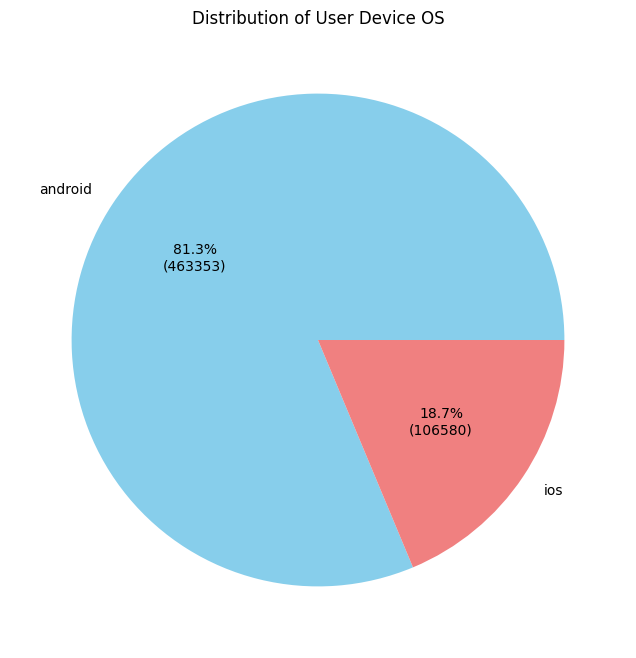

In [ ]:
# Get value counts for 'user_device_os'
os_counts = df['user_device_os'].value_counts()

# Plot the distribution of 'user_device_os' in a pie chart with actual count values
plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=os_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(os_counts) / 100),
        colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of User Device OS')
plt.show()

Based on the distribution of user device operating systems in the dataset:

Android is the dominant operating system, constituting approximately 81.2% of the user devices.
iOS, on the other hand, represents a smaller portion, accounting for around 18.8% of the user devices.

## **Distribution of is_result**

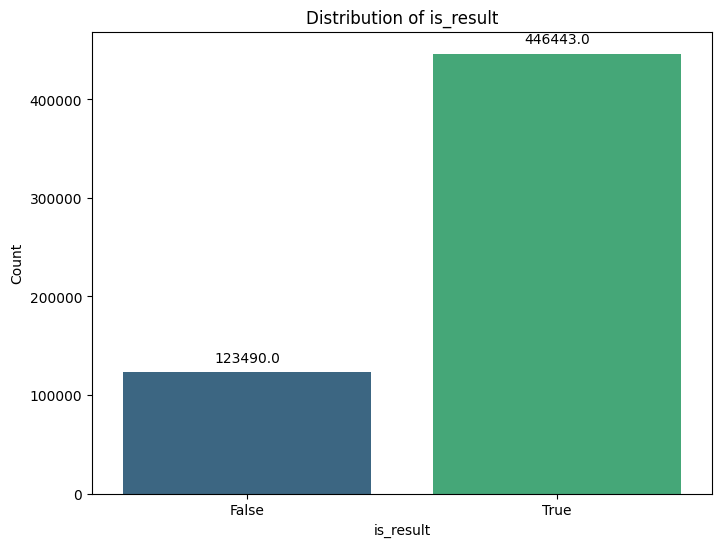

In [ ]:
# Create a count plot to visualize the distribution of the 'is_result'
# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_result', data=df, palette='viridis')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of is_result')
plt.xlabel('is_result')
plt.ylabel('Count')
plt.show()

In [ ]:
is_result_counts = df['is_result'].value_counts().reset_index()
is_result_counts.columns = ['is_result', 'count']
is_result_counts

,is_result,count
0,True,446443
1,False,123490


*  is_result = True: There are 446956 instances where the search gave a result.

*  is_result = False: There are 122977 instances where the search did not give a result.

This suggests that a significant number of searches result in a positive outcome (is_result = True). In contrast, a smaller number of searches do not yield any results (is_result = False).

## **Distribution of Median Pickup Walk Time**

In [ ]:
# Count of unique values in 'median_pickup_walk_time'
pickup_walk_time_counts = df['median_pickup_walk_time'].value_counts().reset_index()

# Rename columns for clarity
pickup_walk_time_counts.columns = ['median_pickup_walk_time', 'count']

# Display the count of each unique value
pickup_walk_time_counts


,median_pickup_walk_time,count
0,0.0,145022
1,420.0,26911
2,360.0,25186
3,300.0,20910
4,240.0,20902
...,...,...
753,31680.0,1
754,22740.0,1
755,24300.0,1
756,23280.0,1


There are counts of `median_pickup_walk_time` value of **0** because the process of replacing the **null** value with **0** for `is_result = 'False'` during data preprocessing as having `'False'` denotes the failure of the searching process for bus rides.

## **Correlation Matrix**

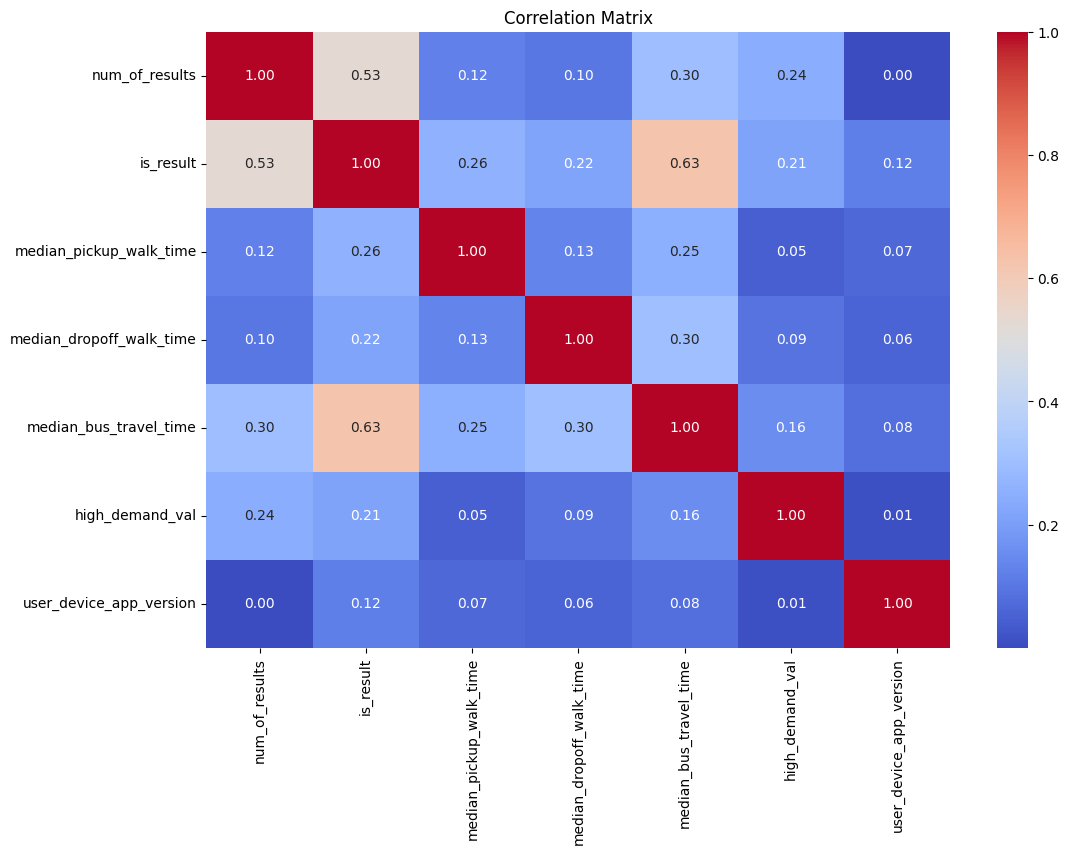

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*   Values close to 1 indicate a strong positive correlation (as one variable
increases, the other tends to also increase).
*   Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).
*   Values close to 0 suggest a weak or no linear correlation.


## **Distribution of Android & IOS App Versions based on User Counts**

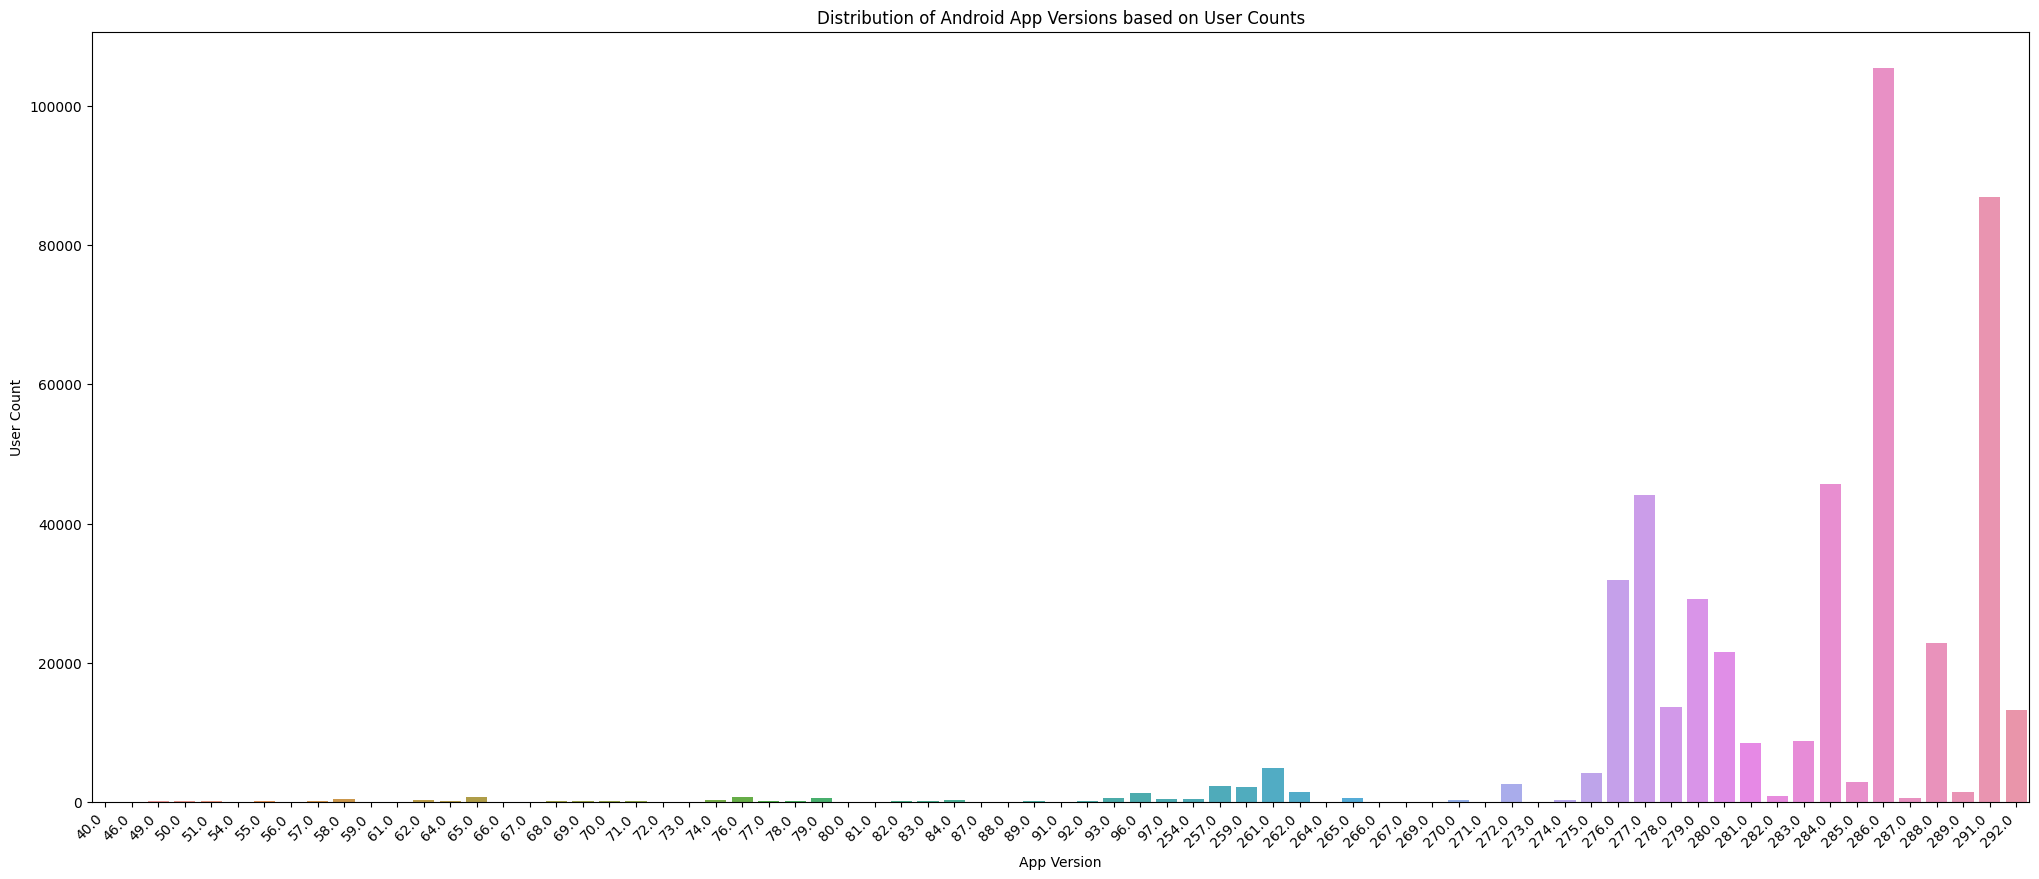

In [ ]:
# Filter data for Android only
android_df = df[df['user_device_os'] == 'android']

# Group by app version and calculate user counts
version_category = android_df.groupby('user_device_app_version').size().reset_index(name='user_count')

# Plot the bar graph
plt.figure(figsize=(25, 10))
sns.barplot(x='user_device_app_version', y='user_count', data=version_category.sort_values('user_count', ascending=False))
plt.title('Distribution of Android App Versions based on User Counts')
plt.xlabel('App Version')
plt.ylabel('User Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Distribution of IOS App Versions based on User Counts**

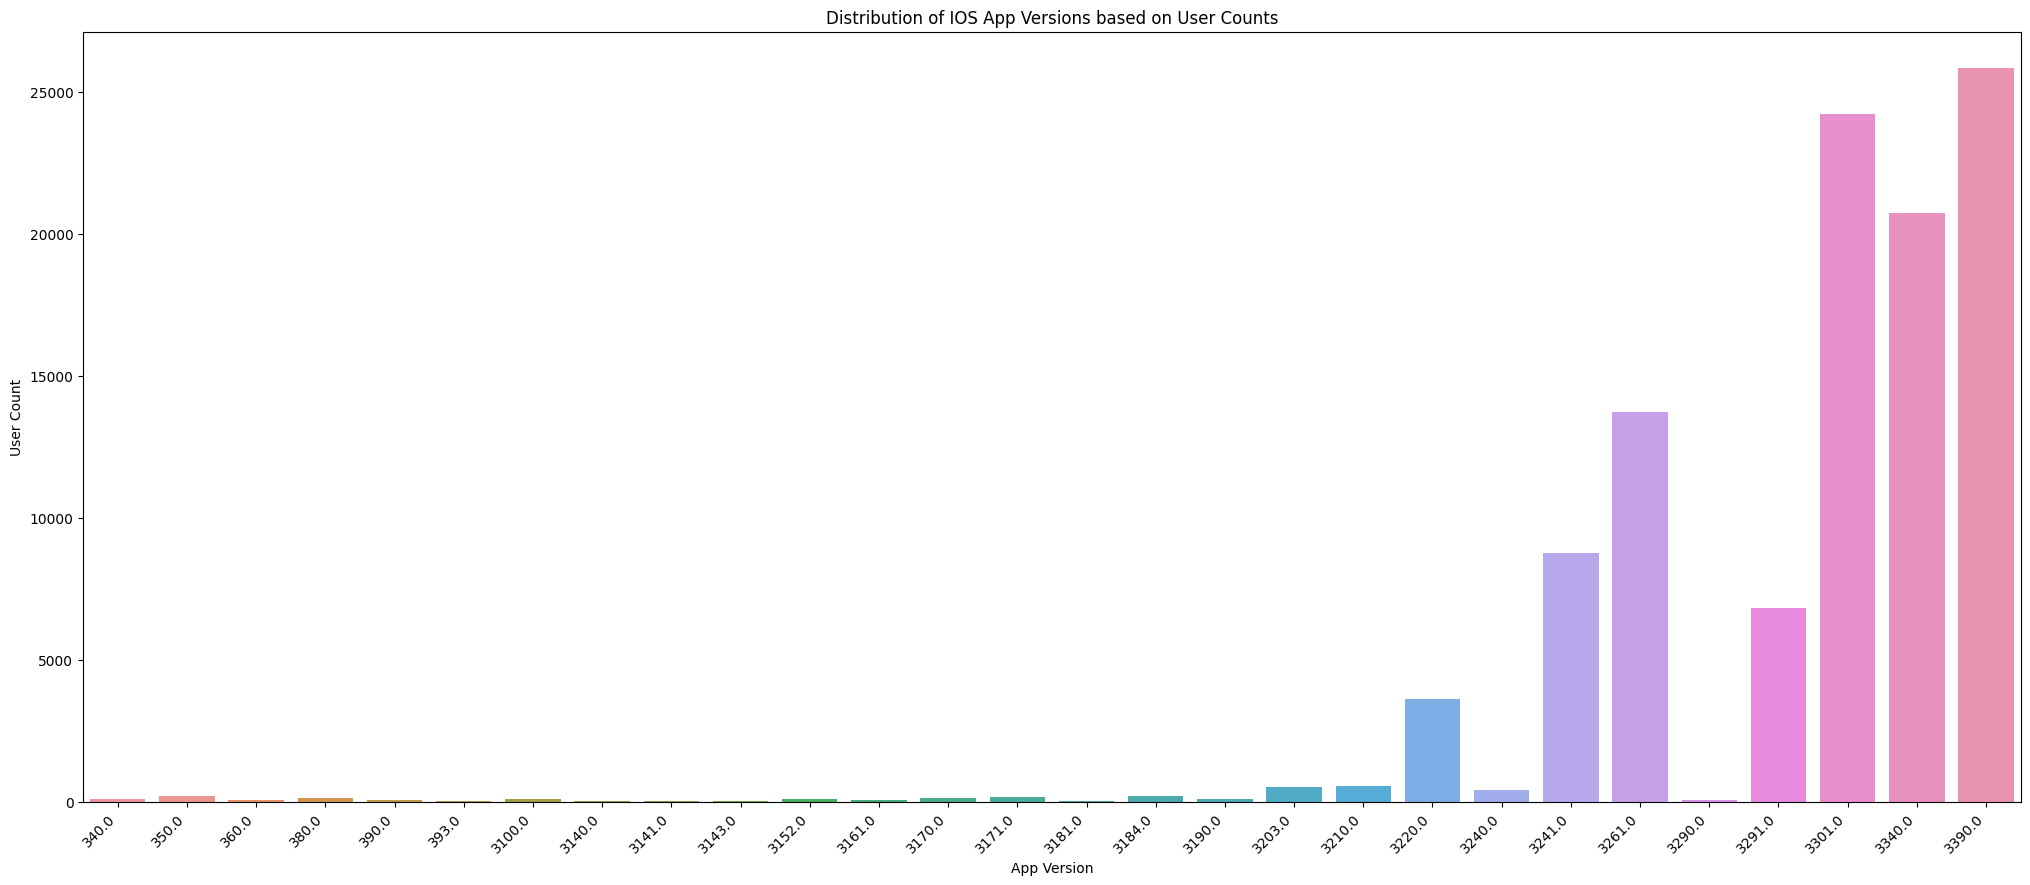

In [ ]:
# Filter data for Android only
android_df = df[df['user_device_os'] == 'ios']

# Group by app version and calculate user counts
version_category = android_df.groupby('user_device_app_version').size().reset_index(name='user_count')

# Plot the bar graph
plt.figure(figsize=(25, 10))
sns.barplot(x='user_device_app_version', y='user_count', data=version_category.sort_values('user_count', ascending=False))
plt.title('Distribution of IOS App Versions based on User Counts')
plt.xlabel('App Version')
plt.ylabel('User Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Group by app version and OS and calculate the count of users
version_category = df.groupby(['user_device_app_version', 'user_device_os']).size().reset_index().rename(columns={0: 'user count'})

# Display the entire DataFrame (remove the display limit)
pd.set_option('display.max_rows', None)

# Filter the DataFrame for Android and iOS separately
android_data = version_category[version_category['user_device_os'] == 'android']
ios_data = version_category[version_category['user_device_os'] == 'ios']

# Display the Android and iOS data separately
print("Android User Counts:")
android_data


Android User Counts:


,user_device_app_version,user_device_os,user count
0,40.0,android,6
1,46.0,android,38
2,49.0,android,72
3,50.0,android,78
4,51.0,android,72
5,54.0,android,4
6,55.0,android,63
7,56.0,android,37
8,57.0,android,92
9,58.0,android,474


In [ ]:
print("\niOS User Counts:")
ios_data


iOS User Counts:


,user_device_app_version,user_device_os,user count
73,340.0,ios,74
74,350.0,ios,209
75,360.0,ios,51
76,380.0,ios,140
77,390.0,ios,57
78,393.0,ios,32
79,3100.0,ios,91
80,3140.0,ios,29
81,3141.0,ios,32
82,3143.0,ios,23


**Android User Counts:**

* The distribution of Android app versions varies widely, with some versions having significantly higher user counts than others.

* Android app versions like 276.0, 277.0, 278.0, 279.0, 280.0, and 286.0 have very high user counts, suggesting that a large portion of users are using these versions.

* Some versions, such as 284.0 and 285.0, also have substantial user counts but are relatively lower compared to the versions mentioned above.
The user counts decrease for versions outside the more recent ones, but even older versions still have some users.

**iOS User Counts:**

* Similar to Android, there is a wide distribution of user counts across iOS app versions.

* Versions like 3241.0, 3340.0, 3390.0, 3220.0, 3261.0, and 3301.0 have notable user counts, indicating popularity among iOS users.

* The user counts for iOS versions appear to be more evenly distributed compared to Android, with multiple versions having substantial user bases.

* There is a substantial drop in user counts for versions older than 3241.0, suggesting that a significant portion of iOS users is using more recent versions.

#**Step 5: Feature Engineering with Automated Tools**


**TPOT** (Tree-based Pipeline Optimization Tool) is an automated machine learning s, model architectures, and hyperparameters to find the best-performing machine learning pipeline for your data.

## **Installing TPOT**

In [ ]:
!pip install -U tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=590ee1191931a45a982e499557432bc9385f1a2358f9568ca4c5f96b476f621a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


## **Importing Libraries**


In [ ]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Define features (X) and target variable (y)**

Assuming 'is_result' is your target variable

In [ ]:
X = df.drop(['is_result'], axis=1)
y = df['is_result']

**Drop non-numeric columns or handle categorical variables**

In [ ]:
X = X.drop(['session_id', 'search_id', 'user_id', 'search_time', 'user_device_os', 'user_device_app_version'], axis=1)

**Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Instantiate a Decision Tree classifie**

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier

DecisionTreeClassifier(random_state=42)

**Fit the classifier**

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Predict on the test set**

In [ ]:
y_pred = dt_classifier.predict(X_test)
y_pred

array([ True,  True,  True, ..., False,  True,  True])

**Evaluate the model on the test set**


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 1.0


The Decision Tree accuracy is 1.0 (100%), it means that the model perfectly predicted the target variable on the test set.

# **Step 6: Feature Selection**
Feature selection is a crucial step in optimizing machine learning models. It involves choosing a subset of relevant features from the original set to improve model performance, reduce overfitting, and enhance interpretability.

## **Feature Importance**

Decision Tree-based models, such as Random Forests or Gradient Boosted Trees, can provide feature importance scores.

## **Importing Libraries**


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## **Create and fit a Random Forest Classifier**

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Create a DataFrame with feature names and their importance scores**

In [ ]:
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

## **Sort features by importance in descending order**

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

## **Display the top features**

In [ ]:
print("Top 5 Features:")
feature_importance_df.head(5)

Top 5 Features:


,Feature,Importance
3,median_bus_travel_time,0.385573
0,num_of_results,0.362001
2,median_dropoff_walk_time,0.149103
1,median_pickup_walk_time,0.102219
4,high_demand_val,0.001103


# **Step 7: Visualization**

## **Plot the feature importance**

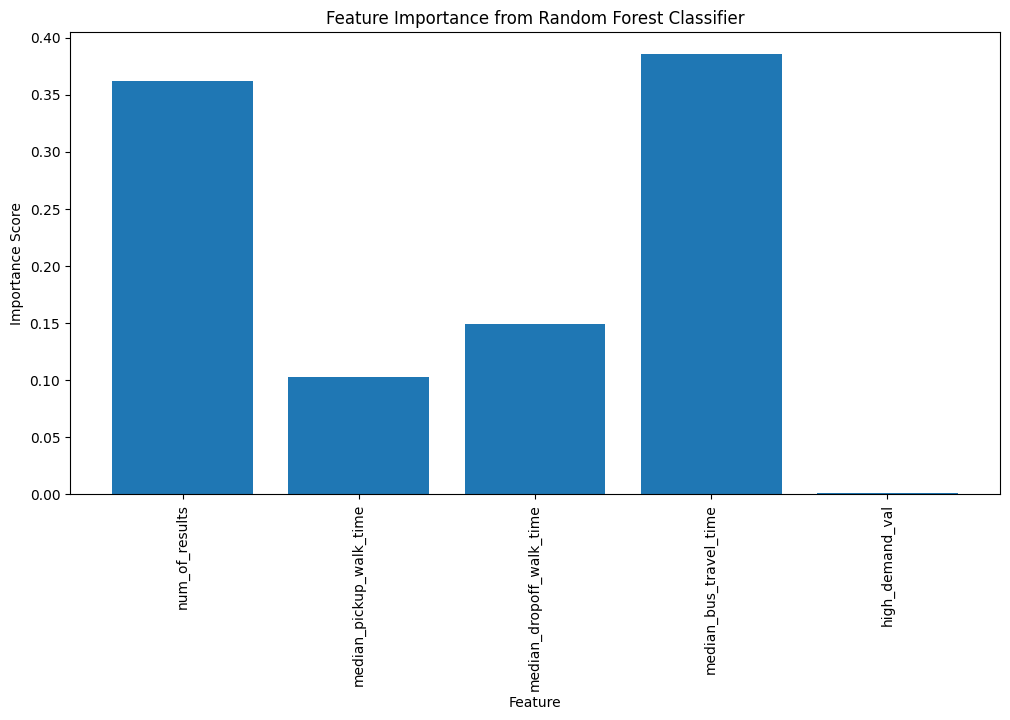

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), X_train.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

* The top three features, namely median_bus_travel_time, num_of_results, and median_dropoff_walk_time, are the most influential in making predictions.

* The feature high_demand_val has extremely low importance and seems to contribute very little to the model.

#**Step 8: Summary**


## Key Findings/Insights:

1. **Critical Features:**
   - The top features influencing the model are `median_bus_travel_time` (38.57%) and `num_of_results` (36.19%).
   - These features likely play a pivotal role in predicting outcomes related to user searches for booking rides.

2. **Less Influential Feature:**
   - `high_demand_val` has minimal importance (0.11%), suggesting it contributes little to the model's predictive power.
   - Consideration should be given to whether it adds value to the model or could be omitted for simplicity.

3. **Travel Time Significance:**
   - Features related to travel time (`median_bus_travel_time`, `median_dropoff_walk_time`, `median_pickup_walk_time`) are crucial for prediction.
   - Users seem to prioritize or be influenced by estimated travel times when making booking decisions.


## Decision Rationale:

1. **Feature Importance:**
   - Decision to focus on top features is based on their significant impact on the model's predictions, as indicated by the importance scores.
   - Priority given to features that align with user behavior and likely influence the decision to book a ride.

2. **Model Interpretability:**
   - Consideration for model interpretability influenced the decision to prioritize features that are easily understandable and explainable.
   - Ensured that the model is not only accurate but also provides insights that can be communicated effectively.

3. **TPOT Usage:**
   - Employed TPOT to automate the machine learning process, exploring a diverse set of models and hyperparameters.
   - Automated approach allows for efficiency in model selection and tuning, considering the complexity of the feature space.
